(178, 13)
Balanced Accuracy: 0.97


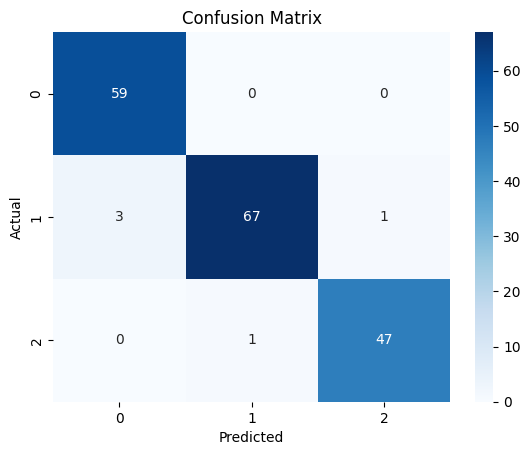

In [ ]:
# Data Science for Medicine and Biology
#
# Nezu Life Sciences
#
# Feel free to modify, redistribute and above all,
# create something with this code.
#
# Tiago Lopes, PhD
# March 2024

# KNN in wine classification

from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the wine recognition dataset
data = load_wine()
X = data.data
y = data.target

print(X.shape)
# Initialize 10-fold stratified split
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize variables to store predictions and real values
all_preds = []
all_y_test = []

# Loop through each fold
for train_index, test_index in kf.split(X, y):
    # Split data
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the model
    model = KNeighborsClassifier(n_neighbors=10)
    model.fit(X_train_scaled, y_train)

    # Store predictions and real values
    preds = model.predict(X_test_scaled)
    all_preds.extend(preds)
    all_y_test.extend(y_test)

# Calculate metrics
balanced_acc = balanced_accuracy_score(all_y_test, all_preds)

# Print metrics
print(f"Balanced Accuracy: {balanced_acc:.2f}")

# Confusion Matrix Heatmap
conf_mat = confusion_matrix(all_y_test, all_preds)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()


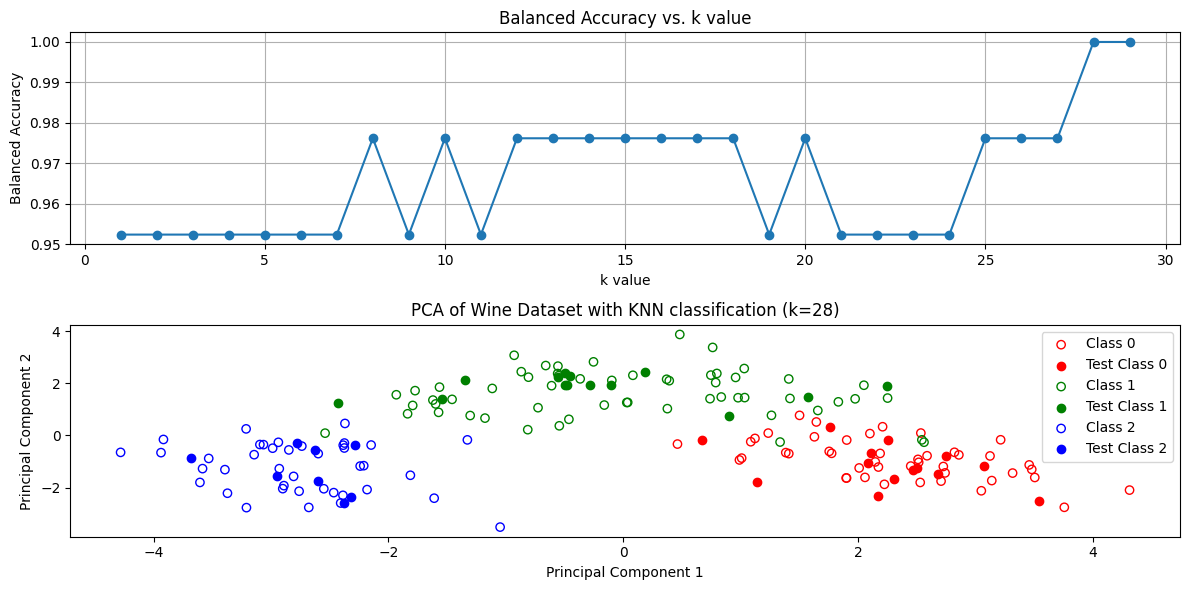

In [ ]:
# KNN and PCA example

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the wine dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Standardize the data (training and test sets separately)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

k_values = list(range(1, 30))
accuracies = []

# Find the best k value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(balanced_accuracy_score(y_test, y_pred))

# Plot the accuracy vs k value
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(k_values, accuracies, marker='o')
plt.title('Balanced Accuracy vs. k value')
plt.xlabel('k value')
plt.ylabel('Balanced Accuracy')
plt.grid(True)

# Standardize the data (whole dataset)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Apply PCA on the standardized data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.20, random_state=42)

# Use the best k value
best_k = k_values[np.argmax(accuracies)]
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_pca, y_train)
y_pred = knn.predict(X_test_pca)

# Plot the PCA results with KNN classification
colors = ['r', 'g', 'b']

plt.subplot(2, 1, 2)
for idx, color in enumerate(colors):
    plt.scatter(X_train_pca[y_train == idx, 0], X_train_pca[y_train == idx, 1], edgecolors=color, facecolors='none', label=f"Class {idx}")
    plt.scatter(X_test_pca[y_test == idx, 0], X_test_pca[y_test == idx, 1], color=color, label=f"Test Class {idx}")
plt.title(f'PCA of Wine Dataset with KNN classification (k={best_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc="upper right")

plt.tight_layout()
plt.show()
